In [3]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import pandas as pd
import numpy as np
import time

In [19]:
def capture_video(filename='output.avi', duration=40, fps=30):
    cap = cv2.VideoCapture(0)  # 0 indica que tomamos la cámara web
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

    start_time = time.time()
    while (time.time() - start_time) < duration:
        ret, frame = cap.read()
        if ret:
            out.write(frame) 
            cv2.imshow('Recording...', frame) 
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Video guardado como {filename}")


In [21]:

# Función para calcular la luminosidad de cada fotograma
def process_video(filename, fps=30):
    cap = cv2.VideoCapture(filename)
    luminosities = []
    timestamps = []

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        
        luminosity = np.mean(gray_frame)

        
        time_in_sec = frame_count / fps
        luminosities.append(luminosity)
        timestamps.append(time_in_sec)

        frame_count += 1

    cap.release()

    #DataFrame con los tiempos y las luminosidades
    df = pd.DataFrame({'time': timestamps, 'I': luminosities})
    return df


In [23]:
capture_video(filename='video_output.avi', duration=40, fps=30)


df = process_video(filename='video_output.avi', fps=30)


print(df)

df.to_csv('luminosity_data.csv', index=False)
print("Datos guardados en 'luminosity_data.csv'")

Video guardado como video_output.avi
           time           I
0      0.000000  127.793584
1      0.033333  127.934674
2      0.066667  128.052555
3      0.100000  128.007350
4      0.133333  127.899199
...         ...         ...
1179  39.300000  118.384629
1180  39.333333  118.172012
1181  39.366667  117.634264
1182  39.400000  117.260840
1183  39.433333  116.702799

[1184 rows x 2 columns]
Datos guardados en 'luminosity_data.csv'


       time           I
0  0.000000  127.793584
1  0.033333  127.934674
2  0.066667  128.052555
3  0.100000  128.007350
4  0.133333  127.899199
El archivo tiene 1184 filas y 2 columnas.


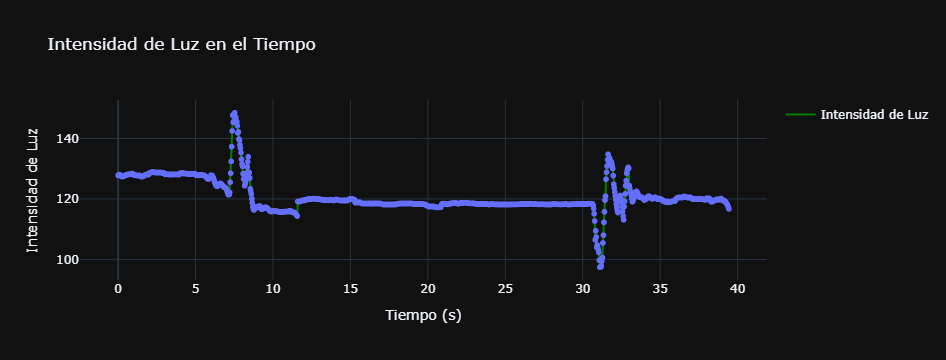

In [25]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


data = pd.read_csv('luminosity_data.csv')


print(data.head())
print(f"El archivo tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

fig = px.scatter(data, x='time', y='I', title='Intensidad de Luz en el Tiempo',
                 labels={'time': 'Tiempo (s)', 'I': 'Intensidad de Luz'},
                 template='plotly_dark')
fig.add_scatter(x=data['time'], y=data['I'], mode='lines', name='Intensidad de Luz', line=dict(color='green'))

# Mostrar la gráfica
fig.show()